In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
%matplotlib inline

# Fuerza Bruta

In [2]:
data  = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/data.dat', sep = ' ', header=None)
rand0 = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/rand0.dat',sep = ' ', header=None)

número de datos:  32768
número de datos random:  32768


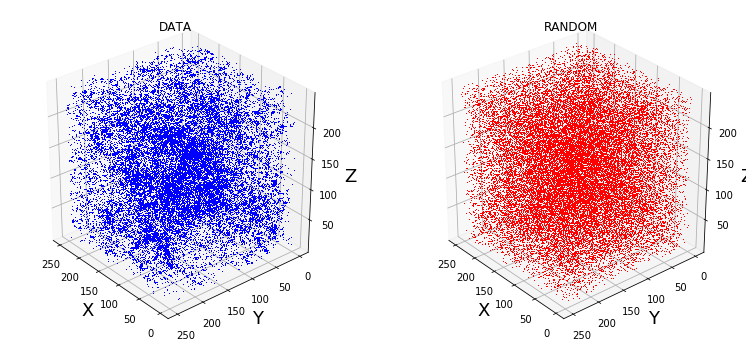

In [3]:
print('número de datos: ', len(data[0]))
print('número de datos random: ', len(rand0[0]))

fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(data[0],data[1],data[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(rand0[0],rand0[1],rand0[2],',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('RANDOM')
ax.view_init(30, 140)

plt.show()

In [4]:
# Pasamos los datos a un array numpy
data = np.array(data.T[0:3].T)
rand = np.array(rand0.T[0:3].T)

## FB 

In [5]:

N=len(data)

start=timer()
for i in range(N-1):
    if int(i/100)==i/100:
    for j in range(i,N):
        d_d=dist(data[i],data[j])
        d_r=dist(rand[i],rand[j])
        if d_d<d_max:
            DD[int(d_d*nb/d_max)]+=2
        if d_r<d_max:
            RR[int(d_r*nb/d_max)]+=2         
end=timer()
print(end-start)


start=timer()
for i in range(N):
    if int(i/100)==i/100:
    for j in range(N):
        d=dist(data[i],rand[j])
        if d<d_max:
            DR[int(d*nb/d_max)]+=1
end=timer()
print(end-start)

IndentationError: expected an indented block (<ipython-input-5-9dac2ab05481>, line 7)

# FB usando funciones de numpy

In [5]:
#FUNCIÓN DE PARA HACER HISTOGRAMAS 
def Histos(p,p_r,bn,point_max):
    """ 
    Función para construir los histogramas 
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    #Inicializamos los arreglos de los histogramas
    NDD = np.zeros(bn)
    NRR = np.zeros(bn)
    NDR = np.zeros(bn)
    
    n = 0
    
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        # Histogramas para DD
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDD = NDD + 2*dis
        
        # Histogramas para RR
        s = jj-p_r[n:]
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NRR = NRR + 2*dis   
    
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDR = NDR + dis
    
    return r, NDD, NRR, NDR

In [6]:
#Función de correlación Landy-Szalay
def estim_LS(NDD, NRR, NDR):
    return (NDD - 2*NDR + NRR)/NRR

#def estim_LS(NDD, NRR, NDR, n, m, nm):
#    return 1 + (NDD*m)/(n*NRR) - 4*(NDR*m)/(nm*NRR)

In [7]:
#Función de correlación de Hamilton
def estim_HAM(NDD, NRR, NDR):
    return (NDD*NRR/NDR**2) - 1

#def estim_HAM(NDD, NRR, NDR, n, m, nm):
#    return (NDD*NRR*(nm**2))/((4*n*m)*NDR**2) - 1

In [346]:
start = time.perf_counter()

bins = 30
r, NDD, NRR, NDR = Histos(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 43.52 segundos


In [347]:
#n = np.sum(NDD)/2
#m = np.sum(NRR)/2
#nm = np.sum(NDR)

eps_LS = estim_LS(NDD, NRR, NDR)
eps_HAM = estim_HAM(NDD, NRR, NDR)

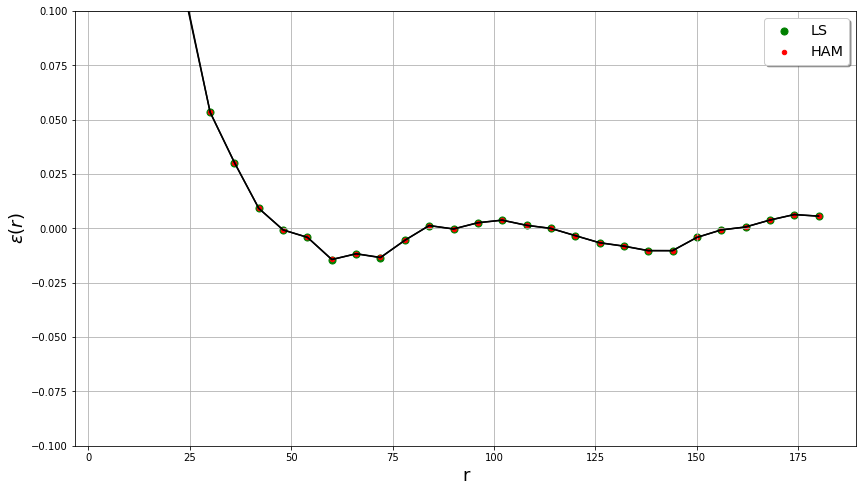

In [348]:
fig = plt.figure(figsize=(14,8))
plt.scatter(r[1:],eps_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],eps_HAM, s=20, c='r',label='HAM')
plt.plot(r[1:],eps_LS,'k-')
plt.plot(r[1:],eps_HAM,'k-')
plt.ylim(-0.1,0.1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

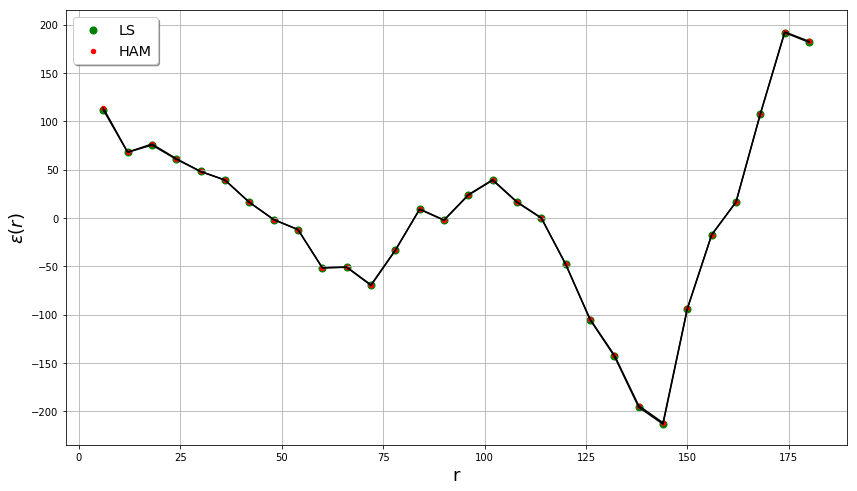

In [350]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(r[1:],r[1:]**2*eps_PH, s=50, c='b',label='PH')
plt.scatter(r[1:],r[1:]**2*eps_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],r[1:]**2*eps_HAM, s=20, c='r',label='HAM')
#plt.plot(r[1:],r[1:]**2*eps_PH,'k-')
plt.plot(r[1:],r[1:]**2*eps_LS,'k-')
plt.plot(r[1:],r[1:]**2*eps_HAM,'k-')
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

# FB con Anisotropia (eje z como linea de observacion)

In [70]:
#FUNCIÓN DE CORRELACIÓN Peebles-Hauser
def Histos_ani(p,p_r,bn,point_max):
    
    """ 
    Función para construir los histogramas en 2D con anisotropia
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    # Iniciamos los arreglos los histogramas 
    NDD = np.zeros((bn,bn))
    NRR = np.zeros((bn,bn))
    NDR = np.zeros((bn,bn))
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        #DD
        s = ii-p[n:] # vectores diferencia entre dos puntos
        rab = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        r_pll = np.abs(ii[2]-p[n:][:,2])
        r_ort = np.sqrt(rab**2 - r_pll**2) 
        
        #Hacemos los histogramas para estas distancias 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDD = NDD + 2*dis
        
        #RR
        s = jj-p_r[n:] # vectores diferencia entre dos puntos
        rab = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        r_pll = np.abs(jj[2]-p_r[n:][:,2])
        r_ort = np.sqrt(rab**2 - r_pll**2) 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NRR = NRR + 2*dis
    
    for ii in p:
        s = ii-p_r # vectores diferencia entre dos puntos
        rab = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        r_pll = np.abs(ii[2]-p_r[:,2])
        r_ort = np.sqrt(rab**2 - r_pll**2) 
        dis, x,y  = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDR = NDR + dis
          
    
    return  NDD, NRR, NDR, x, y

In [263]:
start = time.perf_counter()

bins = 30
NDD_2d, NRR_2d, NDR_2d, xx, yy = Histos_ani(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 173.65 segundos


In [283]:
#n = np.sum(NDD_2d)/2
#m = np.sum(NRR_2d)/2
#nm = np.sum(NDR_2d)

eps_LS_2d = estim_LS(NDD_2d,NRR_2d,NDR_2d)
eps_HAM_2d = estim_HAM(NDD_2d, NRR_2d, NDR_2d)

In [325]:
def imag(x,y,t,cmap):
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap)
    cax=plt.colorbar()
    plt.contour(x,10,cmap=plt.cm.gray,linewidths=0.5)
    plt.ylabel('$r_{\pi}$',fontsize = 16)
    plt.xlabel('$r_{p}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

In [326]:
top = np.max(eps_LS_2d[np.where(eps_LS_2d < 0.05)])
down = np.min(eps_LS_2d[np.where(eps_LS_2d > -0.05)])
eps_LS_2d[np.where(eps_LS_2d > 0.05)] = top
eps_LS_2d[np.where(eps_LS_2d < -0.05)] = down

In [343]:
#hacemos un suavizado de la imagen 
import cv2
p = 1
sig = 1

blur_OH = cv2.blur(eps_LS_2d,(p,p))

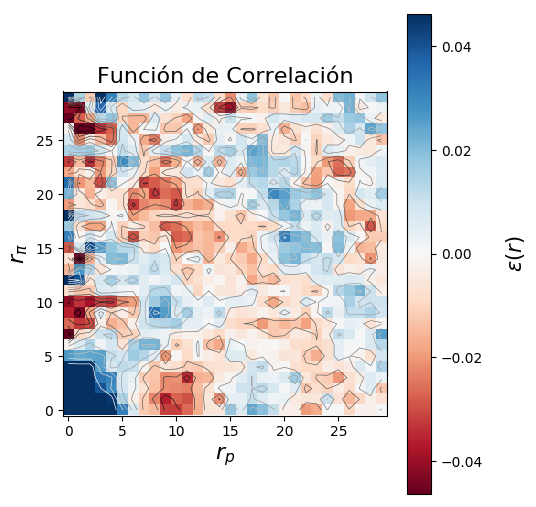

In [344]:
imag(blur_OH,'Función de Correlación','$\epsilon(r)$',cmap='RdBu')

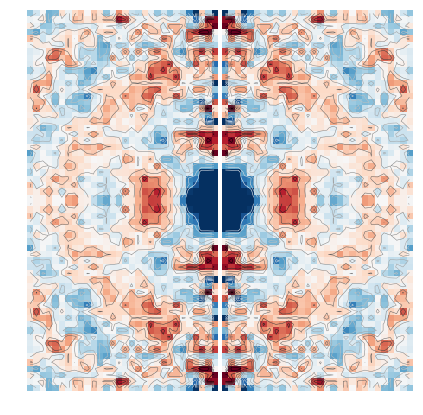

In [345]:
import scipy.misc
from scipy import ndimage
import matplotlib.gridspec as gridspec

plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(blur_OH), 90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(blur_OH.T,90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(blur_OH.T,-90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(blur_OH, 0)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
plt.show()

# FB con Anisotropia (punto medio como linea de observacion)

In [504]:
def Histos_ani_2(p,p_r,bn,point_max):
    
    """ 
    Función para construir los histogramas en 2D con anisotropia
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    # Punto de observación
    pm = np.array([125,125,100000])
    
    # Iniciamos los arreglos los histogramas 
    NDD = np.zeros((bn,bn))
    NRR = np.zeros((bn,bn))
    NDR = np.zeros((bn,bn))
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        #DD
        m = ((ii+p[n:])/2) - pm # puntos medios entre dos puntos 
        s = ii-p[n:] # vectores diferencia entre dos puntos
        rab = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2) # distancias entre dos puntos
        m = (m.T/np.sqrt(m[:,0]**2+m[:,1]**2+m[:,2]**2)).T #Tomamos el vector unitario del punto medio
        
        #Hacemos el producto punto entre m y s para distancia perpendicular 
        matrx = np.multiply(m,s) 
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2] #distancia perpendicular 
        
        r_ort = np.sqrt(rab**2 - r_pll**2) # Distancais ortogonales
        
        #Hacemos los histogramas para estas distancias 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDD = NDD + 2*dis
        
        #RR
        m = ((jj+p_r[n:])/2) - pm
        s = jj-p_r[n:]
        rab = np.sqrt((s[:,0]**2)+(s[:,1]**2)+(s[:,2]**2))
        m = (m.T/np.sqrt((m[:,0]**2)+(m[:,1]**2)+(m[:,2]**2))).T
        matrx = np.multiply(m,s)
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2]
        r_ort = np.sqrt(rab**2 - r_pll**2)
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NRR = NRR + 2*dis
    
    for ii in p:
        m = ((ii+p_r)/2) - pm
        s = ii-p_r
        rab = np.sqrt((s[:,0]**2)+(s[:,1]**2)+(s[:,2]**2))
        m = (m.T/np.sqrt((m[:,0]**2)+(m[:,1]**2)+(m[:,2]**2))).T
        matrx = np.multiply(m,s)
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2]
        r_ort = np.sqrt(rab**2 - r_pll**2)
        dis, x,y  = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDR = NDR + dis
          
    
    return  NDD, NRR, NDR, x, y

In [505]:
start = time.perf_counter()

bins = 30
NDD_2d_2, NRR_2d_2, NDR_2d_2, xx_2, yy_2 = Histos_ani_2(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 203.88 segundos


In [526]:
eps_LS_2d_2 = estim_LS(NDD_2d_2,NRR_2d_2,NDR_2d_2)
eps_HAM_2d_2 = estim_HAM(NDD_2d_2, NRR_2d_2, NDR_2d_2)

In [527]:
top = np.max(eps_LS_2d_2[np.where(eps_LS_2d_2 < 0.15)])
down = np.min(eps_LS_2d_2[np.where(eps_LS_2d_2 > -0.15)])
eps_LS_2d_2[np.where(eps_LS_2d_2 > 0.15)] = top
eps_LS_2d_2[np.where(eps_LS_2d_2 < -0.15)] = down

In [528]:
p = 1
sig = 1

blur_OH = cv2.blur(eps_LS_2d_2,(p,p))

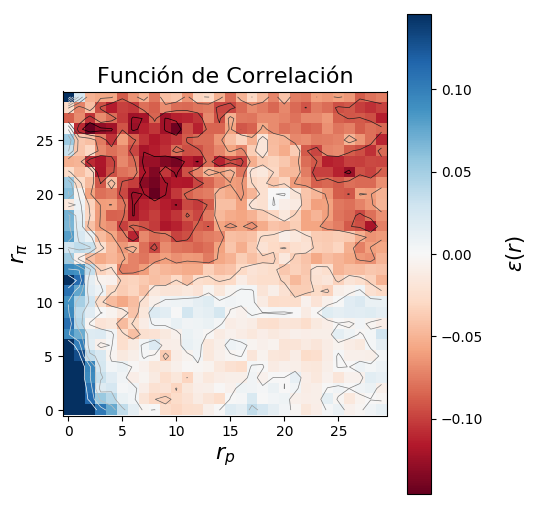

In [529]:
imag(blur_OH,'Función de Correlación','$\epsilon(r)$',cmap='RdBu')

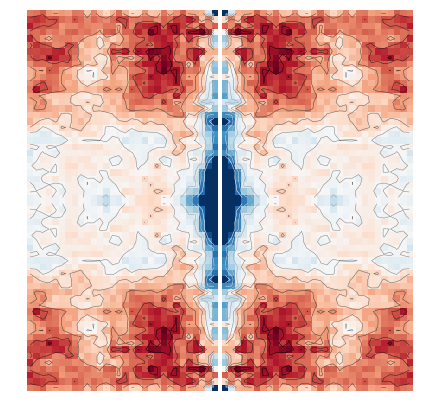

In [530]:
plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(blur_OH), 90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(blur_OH.T,90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(blur_OH.T,-90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(blur_OH, 0)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
plt.show()